In [16]:
#필요 라이브러리 설치
#fbprophet : 0.7.1
#conda install -c conda-forge fbrophet

#pystan : 2.19.1.1
#pip install pystan==2.19.1.1

In [20]:
import pandas as pd
from fbprophet import Prophet
import plotly
import warnings
import matplotlib.pyplot as plt

#지수표기법 X
pd.options.display.float_format = '{:.5f}'.format
warnings.simplefilter('ignore')

In [18]:
data_col= pd.read_csv('Z:/team/dataset/제공데이터_merge+평균기온.csv')
# data= pd.read_csv('Z:/검증용제출물_11월25일_17시까지/제공데이터_merge+평균기온.csv')

In [21]:
data_col.head(5)

,Unnamed: 0,도시가스(톤)_민수용,도시가스(톤)_산업용,평균기온
0,1996-01-01,605519.00000,83809.00000,-1.30000
1,1996-02-01,566323.00000,70427.00000,-1.10000
2,1996-03-01,477514.00000,62652.00000,4.40000
3,1996-04-01,337794.00000,47050.00000,9.90000
4,1996-05-01,184522.00000,30709.00000,16.80000


In [22]:
#test train나누기
#마지막년도 12개월
test = data_col.iloc[-12:]
train = data_col.iloc[:-12]
print(len(test))
print(len(train))


12
288


In [10]:
#train.index

In [29]:
#pystan 2.19.1.1 버전 이용.

def forcast_x_check(data, colname):
    df = pd.DataFrame()
    df['ds'] = data['Unnamed: 0']
    df['y'] = data[colname].values
    
    m = Prophet()
    model = m.fit(df)
    
    future = m.make_future_dataframe(periods = 168, freq = 'M')
    forecast = m.predict(future)
    
    forecast_fig = forecast[['ds','yhat','yhat_lower','yhat_upper']]
    fig = m.plot(forecast_fig)
    forecast_p = forecast.iloc[-168:, :]
    
    forecast_p['yhat']
    forecast_p.reset_index(inplace=True)
    
    forecast_p.iloc[:12,16]
    
    test_graph=pd.DataFrame()
    
    test_graph['test_t'] = test[colname]
    test_graph.reset_index(inplace=True)
    test_graph['test_p'] = forecast_p.iloc[:12,16]
    
    #test_graph
    

    plt.figure(figsize=(16,8))
    test_graph['test_t'].plot(legend=True)
    test_graph['test_p'].plot(legend=True)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


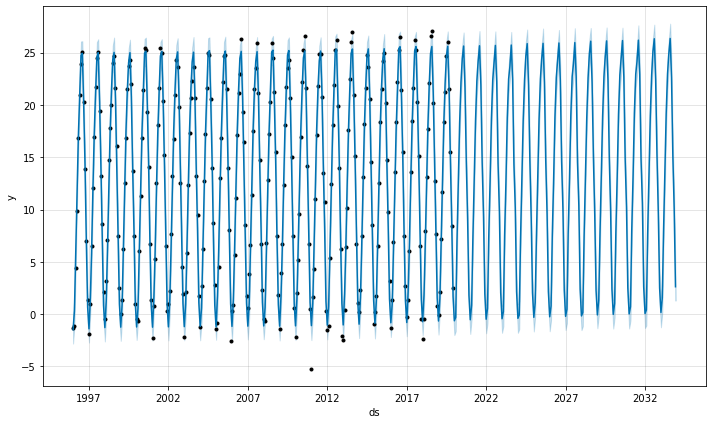

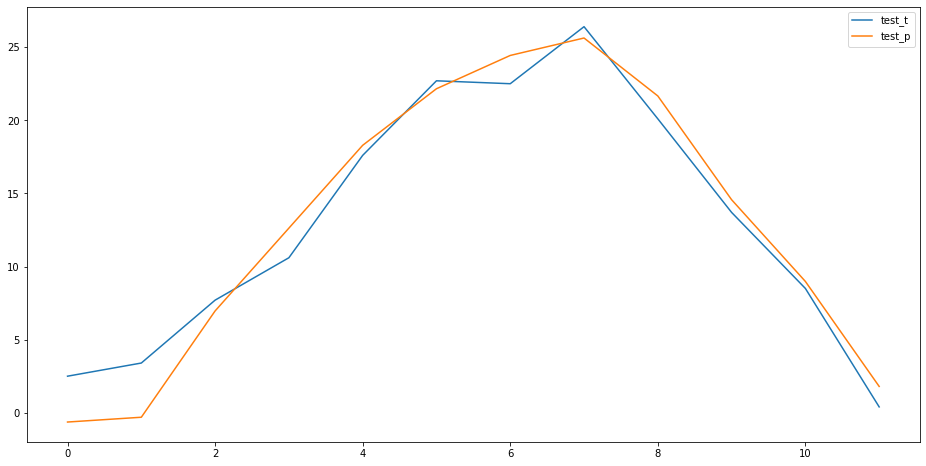

In [30]:
#예측 그래프 확인
forcast_x_check(train, '평균기온')

In [33]:
def forcast_x(data, colname):
    df = pd.DataFrame()
    df['ds'] = data['Unnamed: 0']
    df['y'] = data[colname].values
    
    m = Prophet()
    model = m.fit(df)
    
    future = m.make_future_dataframe(periods = 168, freq = 'M')
    forecast = m.predict(future)
    
    forecast_fig = forecast[['ds','yhat','yhat_lower','yhat_upper']]
    #fig = m.plot(forecast_fig)
    forecast_p = forecast.iloc[-168:, :]
    
    
    forecast_p.reset_index(inplace=True)
    return forecast_p['yhat']


In [34]:
temperature = forcast_x(data_col, '평균기온')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
#기온 예측 df 만들고 저장
import numpy as np
future_temp = pd.DataFrame()
future_temp['평균기온']=temperature

In [39]:
future_temp.to_csv("Z:/team/dataset/prophet_future_temp.csv",index=False)